### NOTE: If running from colab and you have uploaded the folder ERA-V1/era_v1_session7_pankaja then uncomment the two cells below and run before moving on to Install libraries

In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# %cd /gdrive/My\ Drive/ERA-V1/era_v1_session7_pankaja

/gdrive/My Drive/ERA-V1/era_v1_session7_pankaja


### Target:
Add Regularization Dropout to each layer except last layer.

### Results:
-   Parameters: 5,088
-   Best Train Accuracy: 97.94%
-   Best Test Accuracy: 98.64%

### Analysis:
- There is no overfitting at all. With dropout training will be harder, because we are droping the pixels randomly.
- The performance has droppped, we can further improve it.
- But with the current capacity,not possible to push it further.We can possibly increase the capacity of the model by adding a layer after GAP.

# Install libraries

In [3]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

Let's first import all the necessary libraries

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from tqdm import tqdm
from torchsummary import summary

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt

from model import Model_4, download_model_data, create_data_loader, train_and_predict
from utils import get_device, plot_metrics

# Defining Model
 Create a CNN Model Skeleton - Model_4 class in model.py

# Model Summary
 To view and to understand Model Trainable parameteres

In [5]:
device = get_device()
model = Model_4().to(device)
summary(model, input_size=(1, 28, 28))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
           Dropout-3            [-1, 8, 26, 26]               0
              ReLU-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
           Dropout-7           [-1, 16, 24, 24]               0
              ReLU-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
      BatchNorm2d-11            [-1, 8, 12, 12]              16
          Dropout-12            [-1, 8, 12, 12]               0
             ReLU-13            [-1, 8, 12, 12]               0
           Conv2d-

# The Model


In [6]:
model.eval()

Model_4(
  (conv1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): ReLU()
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.1, inplace=False)
    (7): ReLU()
  )
  (trans1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace

## Load and Prepare Dataset

MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels

We load the PIL images using torchvision.datasets.MNIST, while loading the image we transform he data to tensor and normalize the images with mean and std deviation of MNIST images.

Data tasks:
- transformers
- data download
- train and test split

In [7]:
torch.manual_seed(1)
batch_size = 128
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

ds_train, ds_test = download_model_data()
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(ds_train, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(ds_test, batch_size=batch_size, shuffle=False, **kwargs)


CUDA Available? True


### Train & Test our Model
 Let's train and test our model

In [8]:
# load model to device and start the training
model =  Model_4().to(device)
epochs = 15
lr = 0.01
train_losses4, train_acc4, test_losses4, test_acc4 = train_and_predict(model, device,
                                                                   train_loader=train_loader,
                                                                   test_loader=test_loader,
                                                                   num_epochs=epochs, lr=lr)

Epoch 1


Train: Loss=0.3450 Batch_id=468 Accuracy=82.71: 100%|██████████| 469/469 [00:19<00:00, 24.59it/s]


Test set: Average loss: 0.2326, Accuracy: 9604/10000 (96.04%)

Epoch 2


Train: Loss=0.2975 Batch_id=468 Accuracy=94.92: 100%|██████████| 469/469 [00:20<00:00, 22.63it/s]


Test set: Average loss: 0.1198, Accuracy: 9753/10000 (97.53%)

Epoch 3


Train: Loss=0.1073 Batch_id=468 Accuracy=96.32: 100%|██████████| 469/469 [00:20<00:00, 23.37it/s]


Test set: Average loss: 0.0966, Accuracy: 9786/10000 (97.86%)

Epoch 4


Train: Loss=0.1181 Batch_id=468 Accuracy=96.86: 100%|██████████| 469/469 [00:18<00:00, 24.75it/s]


Test set: Average loss: 0.0835, Accuracy: 9800/10000 (98.00%)

Epoch 5


Train: Loss=0.1157 Batch_id=468 Accuracy=97.08: 100%|██████████| 469/469 [00:19<00:00, 23.50it/s]


Test set: Average loss: 0.0728, Accuracy: 9819/10000 (98.19%)

Epoch 6


Train: Loss=0.0723 Batch_id=468 Accuracy=97.27: 100%|██████████| 469/469 [00:18<00:00, 24.73it/s]


Test set: Average loss: 0.0673, Accuracy: 9826/10000 (98.26%)

Epoch 7


Train: Loss=0.1801 Batch_id=468 Accuracy=97.40: 100%|██████████| 469/469 [00:19<00:00, 23.48it/s]


Test set: Average loss: 0.0585, Accuracy: 9851/10000 (98.51%)

Epoch 8


Train: Loss=0.1694 Batch_id=468 Accuracy=97.48: 100%|██████████| 469/469 [00:18<00:00, 25.01it/s]


Test set: Average loss: 0.0648, Accuracy: 9834/10000 (98.34%)

Epoch 9


Train: Loss=0.0737 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:19<00:00, 24.37it/s]


Test set: Average loss: 0.0568, Accuracy: 9850/10000 (98.50%)

Epoch 10


Train: Loss=0.0939 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:19<00:00, 24.14it/s]


Test set: Average loss: 0.0573, Accuracy: 9838/10000 (98.38%)

Epoch 11


Train: Loss=0.0912 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:19<00:00, 23.78it/s]


Test set: Average loss: 0.0538, Accuracy: 9853/10000 (98.53%)

Epoch 12


Train: Loss=0.0746 Batch_id=468 Accuracy=97.85: 100%|██████████| 469/469 [00:20<00:00, 23.17it/s]


Test set: Average loss: 0.0503, Accuracy: 9872/10000 (98.72%)

Epoch 13


Train: Loss=0.0320 Batch_id=468 Accuracy=97.85: 100%|██████████| 469/469 [00:19<00:00, 24.38it/s]


Test set: Average loss: 0.0445, Accuracy: 9877/10000 (98.77%)

Epoch 14


Train: Loss=0.1186 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:19<00:00, 23.97it/s]


Test set: Average loss: 0.0437, Accuracy: 9875/10000 (98.75%)

Epoch 15


Train: Loss=0.0646 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:20<00:00, 23.13it/s]


Test set: Average loss: 0.0455, Accuracy: 9868/10000 (98.68%)



### Plot the train and test losses and accuracies for Model_4

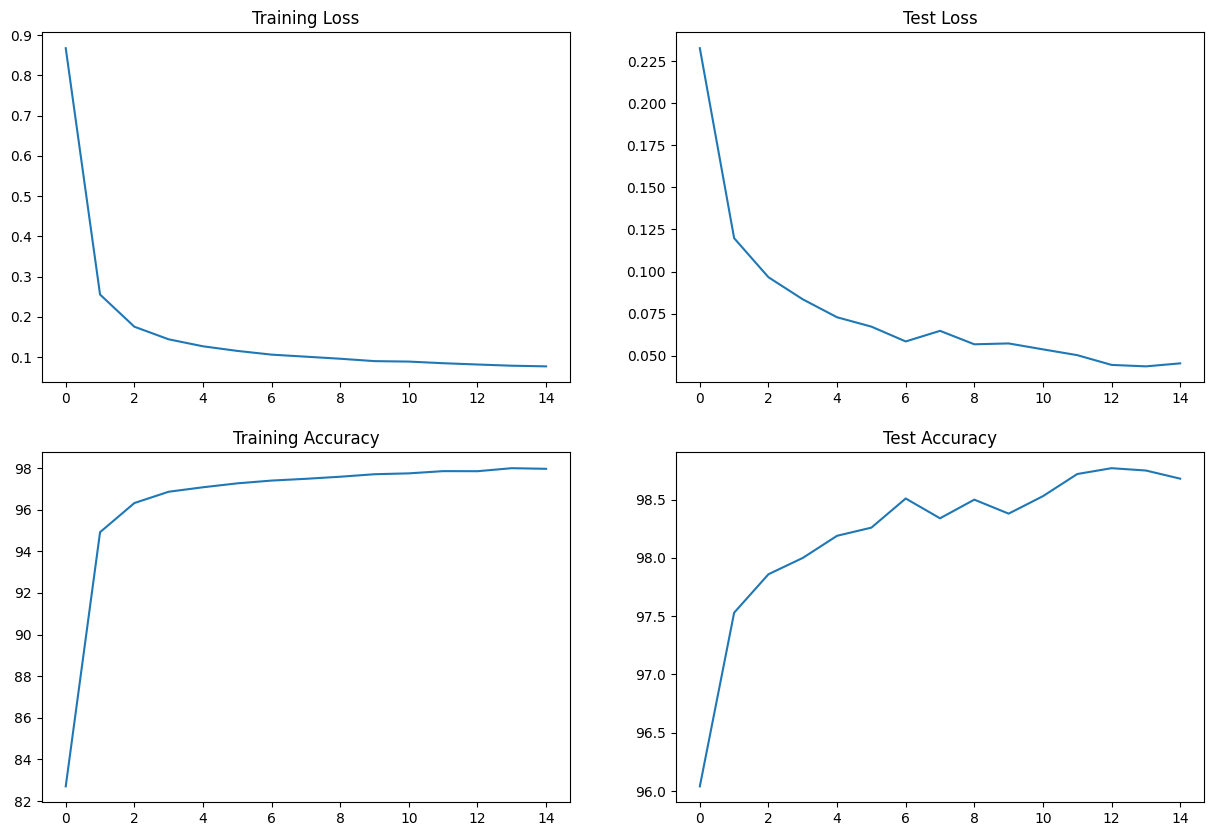

In [9]:
plot_metrics(train_losses4, train_acc4, test_losses4, test_acc4)